## Dataset has different food items and amount of nutrients present in that food.

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

#### Read the data

In [214]:
df = pd.read_csv('Nutrients.csv')
df.head()

,Food,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,Honeydew_Melon,36,0.14,18,228,9.00,0.54,34.00,18.0,6.0,0.17
1,Potato,77,0.09,6,421,17.00,2.00,1.34,19.7,12.0,0.78
2,Sweet Corn,86,1.18,15,270,19.00,3.20,0.00,6.8,2.0,0.52
3,Celery,16,0.17,80,260,2.79,0.69,0.00,3.1,40.0,0.20
4,Pomegranates,83,1.17,3,236,18.70,1.67,0.00,10.2,10.0,0.30


#### Check for missing values

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Food          61 non-null     object 
 1   Calories      61 non-null     int64  
 2   Fat           61 non-null     float64
 3   Sodium        61 non-null     int64  
 4   Potassium     61 non-null     int64  
 5   Carbohydrate  61 non-null     float64
 6   Protein       61 non-null     float64
 7   Vitamin A     61 non-null     float64
 8   Vitamin C     61 non-null     float64
 9   Calcium       61 non-null     float64
 10  Iron          61 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 5.4+ KB


We can see that there are no missing values and the data types are also correct for our analysis.

#### Remove columns which are not required.

Food column does not help in our analysis, hence we remove this column from further analysis.

In [216]:
data = df.copy()

In [217]:
data.drop('Food',axis=1,inplace=True)
data.head()

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,36,0.14,18,228,9.00,0.54,34.00,18.0,6.0,0.17
1,77,0.09,6,421,17.00,2.00,1.34,19.7,12.0,0.78
2,86,1.18,15,270,19.00,3.20,0.00,6.8,2.0,0.52
3,16,0.17,80,260,2.79,0.69,0.00,3.1,40.0,0.20
4,83,1.17,3,236,18.70,1.67,0.00,10.2,10.0,0.30


#### Scaling

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
ss = StandardScaler()
data_scale = pd.DataFrame(ss.fit_transform(data),columns=data.columns)
data_scale.head()

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,-0.680710,-0.468342,-0.429413,-0.409152,0.362252,-0.724182,0.732688,0.126930,-0.837259,-0.619111
1,0.362461,-0.498877,-0.564260,1.253583,1.650072,-0.574873,-0.381634,0.204311,-0.558984,0.163400
2,0.591450,0.166793,-0.463125,-0.047313,1.972026,-0.452153,-0.427353,-0.382878,-1.022776,-0.170129
3,-1.189574,-0.450021,0.267301,-0.133465,-0.637418,-0.708842,-0.427353,-0.551297,0.739635,-0.580627
4,0.515121,0.160686,-0.597972,-0.340230,1.923733,-0.608621,-0.427353,-0.228115,-0.651742,-0.452347


#### Build model

In [220]:
from sklearn.cluster import DBSCAN

The choice of eps and min_samples for DBSCAN mainly depends on domain knowledge. If we do not have domain knowledge we are left with trial and error method for choosing them.

In [221]:
model = DBSCAN(eps=2.4,min_samples=4)
model.fit(data_scale)
predict = model.labels_

In [222]:
df['Clusters'] = predict
df.head()

,Food,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron,Clusters
0,Honeydew_Melon,36,0.14,18,228,9.00,0.54,34.00,18.0,6.0,0.17,0
1,Potato,77,0.09,6,421,17.00,2.00,1.34,19.7,12.0,0.78,0
2,Sweet Corn,86,1.18,15,270,19.00,3.20,0.00,6.8,2.0,0.52,0
3,Celery,16,0.17,80,260,2.79,0.69,0.00,3.1,40.0,0.20,0
4,Pomegranates,83,1.17,3,236,18.70,1.67,0.00,10.2,10.0,0.30,0


In [223]:
df.drop('Food',axis=1,inplace=True)

In [224]:
df['Clusters'].value_counts()

 0    40
-1    12
 1     9
Name: Clusters, dtype: int64

#### Visualization

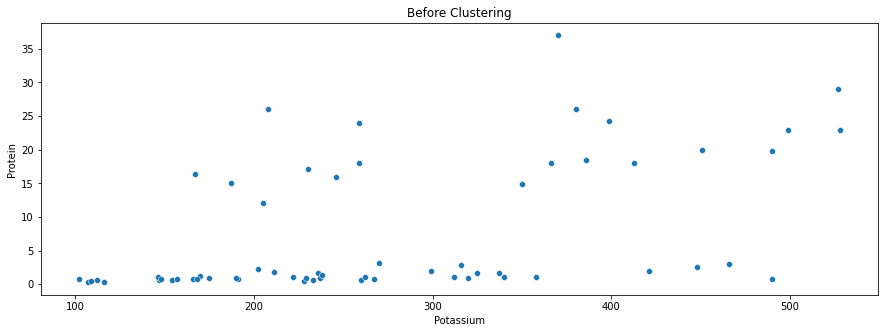

In [225]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['Potassium'],df['Protein'])
plt.title('Before Clustering')
plt.show()

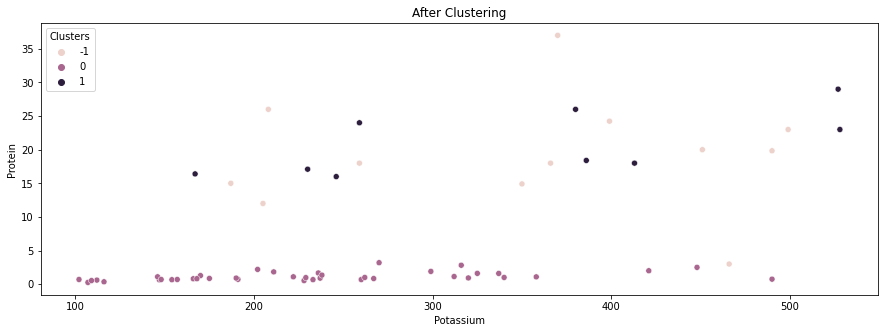

In [226]:
plt.figure(figsize=(15,5))
sns.scatterplot(df['Potassium'],df['Protein'],hue=df['Clusters'])
plt.title('After Clustering')
plt.show()

#### Inference

In [227]:
df.groupby('Clusters').agg('mean')

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
Clusters,,,,,,,,,,
-1,106.166667,2.864167,189.583333,354.166667,1.025000,19.249167,27.463417,3.575000,43.083333,1.346667
0,41.525000,0.243750,12.800000,235.475000,9.903250,1.150250,9.220750,21.982500,19.350000,0.451250
1,99.222222,1.244444,71.333333,348.444444,0.366667,20.877778,7.295556,0.633333,19.577778,0.622222


Cluster 0: Large amount of Potassium is a part of this cluster and least is Fat.

Cluster 1: Large amount of Potassium is a part of this cluster and least is Carbohydrate.

Cluster -1: Noise or outliers